In [ ]:
import matplotlib.pyplot as plt # Used for creating visualizations (plots)
import numpy as np # Provides numerical computing functions (arrays, matrices, etc.)

# Import specific components from Keras
from keras import backend as K # Accesses backend functions (e.g., for loss calculation)

# Load MNIST dataset (images of handwritten digits 0-9)
#from keras.datasets import mnist # Provides access to pre-loaded datasets

# Import various building blocks for neural network layers
from keras.layers import (Activation, BatchNormalization, Concatenate, Dense, # Applies activation functions to layer outputs # Normalizes layer inputs for better training stability
                          Dropout, Flatten, Input, Lambda, Reshape) # Concatenates outputs from multiple layers # Fully-connected layers with learnable weights and biases # Randomly drops units during training to prevent overfitting
                                                                    # Flattens multi-dimensional arrays into vectors # Defines the input layer of a model # Allows creating custom logic within a layer # Reshapes the output of a layer to a new dimension
from keras.layers import LeakyReLU # Reshapes the output of a layer to a new dimension

# Import convolutional layers and their transposed counterparts
from keras.layers import Conv2D, Conv2DTranspose # Convolutional layers for image processing
from keras.models import Model, Sequential # Functions to create neural network models
from keras.optimizers import Adam # Optimization algorithm for training the model
from keras.utils import to_categorical # Converts categorical labels to one-hot vectors

In [ ]:
# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Copy the kaggle.json file to the .kaggle directory
# Make sure you've uploaded the kaggle.json file to the current directory
!cp kaggle.json ~/.kaggle/

# Change the permissions of the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
# The dataset identifier is 'prasunroy/natural-images'
!kaggle datasets download -d prasunroy/natural-images

# Create the extraction directory
!mkdir -p /content/input/natural-images/data/

# Unzip the downloaded dataset
!unzip 'natural-images.zip' -d /content/input/natural-images/data/

print("Dataset downloaded and unzipped successfully.")

Streaming output truncated to the last 5000 lines.
  inflating: /content/input/natural-images/data/natural_images/cat/cat_0205.jpg  
  inflating: /content/input/natural-images/data/natural_images/cat/cat_0206.jpg  
  inflating: /content/input/natural-images/data/natural_images/cat/cat_0207.jpg  
  inflating: /content/input/natural-images/data/natural_images/cat/cat_0208.jpg  
  inflating: /content/input/natural-images/data/natural_images/cat/cat_0209.jpg  
  inflating: /content/input/natural-images/data/natural_images/cat/cat_0210.jpg  
  inflating: /content/input/natural-images/data/natural_images/cat/cat_0211.jpg  
  inflating: /content/input/natural-images/data/natural_images/cat/cat_0212.jpg  
  inflating: /content/input/natural-images/data/natural_images/cat/cat_0213.jpg  
  inflating: /content/input/natural-images/data/natural_images/cat/cat_0214.jpg  
  inflating: /content/input/natural-images/data/natural_images/cat/cat_0215.jpg  
  inflating: /content/input/natural-images/data

In [ ]:
import os
from PIL import Image

# Path to the dataset directory
data_dir = '/content/input/natural-images/data/natural_images'

# Function to get image dimensions
def get_image_dimensions(directory):
    image_dims = []

    # Walk through all directories and subdirectories
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                image_path = os.path.join(root, file)
                try:
                    with Image.open(image_path) as img:
                        width, height = img.size
                        image_dims.append((image_path, width, height))
                except Exception as e:
                    print(f"Could not open image {image_path}: {e}")

    return image_dims

# Get image dimensions
image_dimensions = get_image_dimensions(data_dir)

# Display the dimensions
print("Image Dimensions (Filename, Width, Height):")
for img_info in image_dimensions:
    print(f"{img_info[0]}: {img_info[1]}x{img_info[2]}")


Streaming output truncated to the last 5000 lines.
/content/input/natural-images/data/natural_images/car/car_0619.jpg: 100x100
/content/input/natural-images/data/natural_images/car/car_0524.jpg: 100x100
/content/input/natural-images/data/natural_images/car/car_0221.jpg: 100x100
/content/input/natural-images/data/natural_images/car/car_0225.jpg: 100x100
/content/input/natural-images/data/natural_images/car/car_0269.jpg: 100x100
/content/input/natural-images/data/natural_images/car/car_0957.jpg: 100x100
/content/input/natural-images/data/natural_images/car/car_0469.jpg: 100x100
/content/input/natural-images/data/natural_images/car/car_0237.jpg: 100x100
/content/input/natural-images/data/natural_images/car/car_0366.jpg: 100x100
/content/input/natural-images/data/natural_images/car/car_0850.jpg: 100x100
/content/input/natural-images/data/natural_images/car/car_0856.jpg: 100x100
/content/input/natural-images/data/natural_images/car/car_0965.jpg: 100x100
/content/input/natural-images/data/na

In [ ]:
# Define paths and image parameters
data_dir = '/content/input/natural-images/data/natural_images'
output_dir = '/content/input/natural-images/data/resized_images'
target_size = (100, 100)
img_rows = 224
img_cols = 224
channels = 3
img_shape = (img_rows, img_cols, channels)
z_dim = 100
num_classes = 8

# Function to resize images
def resize_images(directory, output_directory, size):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                image_path = os.path.join(root, file)
                try:
                    with Image.open(image_path) as img:
                        img = img.resize(size, Image.ANTIALIAS)
                        output_path = os.path.join(output_directory, os.path.relpath(image_path, directory))
                        os.makedirs(os.path.dirname(output_path), exist_ok=True)
                        img.save(output_path)
                        print(f"Resized {image_path} to {size} and saved to {output_path}")
                except Exception as e:
                    print(f"Could not process image {image_path}: {e}")

# Resize images
resize_images(data_dir, output_dir, target_size)
print(f"All images have been resized to {target_size} and saved to {output_dir}")

<ipython-input-14-977c1a022ec9>:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)


Streaming output truncated to the last 5000 lines.
Resized /content/input/natural-images/data/natural_images/car/car_0524.jpg to (100, 100) and saved to /content/input/natural-images/data/resized_images/car/car_0524.jpg
Resized /content/input/natural-images/data/natural_images/car/car_0221.jpg to (100, 100) and saved to /content/input/natural-images/data/resized_images/car/car_0221.jpg
Resized /content/input/natural-images/data/natural_images/car/car_0225.jpg to (100, 100) and saved to /content/input/natural-images/data/resized_images/car/car_0225.jpg
Resized /content/input/natural-images/data/natural_images/car/car_0269.jpg to (100, 100) and saved to /content/input/natural-images/data/resized_images/car/car_0269.jpg
Resized /content/input/natural-images/data/natural_images/car/car_0957.jpg to (100, 100) and saved to /content/input/natural-images/data/resized_images/car/car_0957.jpg
Resized /content/input/natural-images/data/natural_images/car/car_0469.jpg to (100, 100) and saved to /c

In [ ]:
# Dataset class definition
class Dataset:
    def __init__(self, num_labeled, img_size=(224, 224), limit=5000):
        self.num_labeled = num_labeled
        self.img_size = img_size
        self.limit = limit
        self.class_names = ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
        self.class_map = {name: idx for idx, name in enumerate(self.class_names)}
        self.x_data, self.y_data = self.load_and_preprocess_images(output_dir)
        self.x_train, self.y_train, self.x_test, self.y_test = self.split_data()

    def load_and_preprocess_images(self, directory):
        images, labels = [], []
        image_count = 0
        for root, _, files in os.walk(directory):
            for file in files:
                if file.lower().endswith(('png', 'jpg', 'jpeg')):
                    image_path = os.path.join(root, file)
                    try:
                        with Image.open(image_path) as img:
                            img = img.resize(self.img_size, Image.ANTIALIAS)
                            img_array = np.array(img)
                            images.append(img_array)
                            label_name = os.path.basename(root)
                            if label_name in self.class_map:
                                labels.append(self.class_map[label_name])
                    except Exception as e:
                        print(f"Could not process image {image_path}: {e}")
                    image_count += 1
                    if self.limit and image_count >= self.limit:
                        break
            if self.limit and image_count >= self.limit:
                break
        images = np.array(images, dtype=np.float32) / 255.0
        labels = to_categorical(labels, num_classes=len(self.class_names))
        return images, labels

    def split_data(self):
        labeled_per_class = self.num_labeled // len(self.class_names)
        labeled_indices = []
        for label in range(len(self.class_names)):
            class_indices = np.where(np.argmax(self.y_data, axis=1) == label)[0]
            np.random.shuffle(class_indices)
            labeled_indices.extend(class_indices[:labeled_per_class])
        np.random.shuffle(labeled_indices)
        labeled_indices = np.array(labeled_indices)
        x_train_labeled = self.x_data[labeled_indices]
        y_train_labeled = self.y_data[labeled_indices]
        split_idx = int(0.8 * len(x_train_labeled))
        x_train = x_train_labeled[:split_idx]
        y_train = y_train_labeled[:split_idx]
        x_test = x_train_labeled[split_idx:]
        y_test = y_train_labeled[split_idx:]
        return x_train, y_train, x_test, y_test

    def batch_labeled(self, batch_size):
        idx = np.random.randint(0, min(self.num_labeled, len(self.x_train)), batch_size)
        return self.x_train[idx], self.y_train[idx]

    def batch_unlabeled(self, batch_size):
        idx = np.random.randint(0, len(self.x_train), batch_size)
        return self.x_train[idx]

    def training_set(self):
        return self.x_train, self.y_train

    def test_set(self):
        return self.x_test, self.y_test

In [ ]:
# Number of labeled examples to use (rest will be used as unlabeled)
num_labeled = 100

# Initialize the dataset with a limit of 2000 images
dataset = Dataset(num_labeled, img_size=(224, 224), limit=5000)


# Example usage of the dataset
# Get labeled training data
x_train_labeled, y_train_labeled = dataset.training_set()
print(f"Labeled training images shape: {x_train_labeled.shape}")
print(f"Labeled training labels shape: {y_train_labeled.shape}")

# Get unlabeled training data
x_train_unlabeled = dataset.batch_unlabeled(num_labeled)
print(f"Unlabeled training images shape: {x_train_unlabeled.shape}")

# Get a batch of labeled images
x_batch_labeled, y_batch_labeled = dataset.batch_labeled(batch_size=10)
print(f"Batch of labeled images shape: {x_batch_labeled.shape}")
print(f"Batch of labeled labels shape: {y_batch_labeled.shape}")

# Get the test set
x_test, y_test = dataset.test_set()
print(f"Test images shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")


<ipython-input-30-029165046974>:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(self.img_size, Image.ANTIALIAS)


Labeled training images shape: (57, 224, 224, 3)
Labeled training labels shape: (57, 8)
Unlabeled training images shape: (100, 224, 224, 3)
Batch of labeled images shape: (10, 224, 224, 3)
Batch of labeled labels shape: (10, 8)
Test images shape: (15, 224, 224, 3)
Test labels shape: (15, 8)


In [ ]:
# Image dimensions
img_rows = 224
img_cols = 224
channels = 3  # Since the natural images are in color

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
z_dim = 100

# Number of classes in the dataset
num_classes = 8  # Adjusted to the number of classes in the 'natural images' dataset


In [ ]:
# Ensure the dataset object is created
dataset = Dataset(num_labeled=400, img_size=(224, 224), limit=5000)

def build_generator(z_dim):
    model = Sequential()
    model.add(Dense(256 * 7 * 7, input_dim=z_dim))
    model.add(Reshape((7, 7, 256)))
    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(Conv2DTranspose(32, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(Conv2DTranspose(16, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(Conv2DTranspose(3, kernel_size=3, strides=2, padding='same'))
    model.add(Activation('tanh'))
    return model

def build_discriminator_net(img_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding="same"))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.25))
    model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid', name='real_fake_output'))
    return model

def build_discriminator_supervised(discriminator_net):
    model = Sequential()
    for layer in discriminator_net.layers[:-1]:
        model.add(layer)
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

def build_discriminator_unsupervised(discriminator_net):
    model = Sequential()
    for layer in discriminator_net.layers:
        model.add(layer)
    real_fake_output = model.get_layer(name='real_fake_output').output
    def real_vs_fake_predict(x):
        prediction = 1.0 - (1.0 / (K.sum(K.exp(x), axis=-1, keepdims=True) + 1.0))
        return prediction
    model.add(Lambda(real_vs_fake_predict, name='real_fake_prediction'))
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(z_dim,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer=Adam(), loss='binary_crossentropy')
    return gan

# Core Discriminator network
discriminator_net = build_discriminator_net(img_shape)

# Build and compile the Discriminator for supervised training
discriminator_supervised = build_discriminator_supervised(discriminator_net)
discriminator_supervised.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

# Build and compile the Discriminator for unsupervised training
discriminator_unsupervised = build_discriminator_unsupervised(discriminator_net)
discriminator_unsupervised.compile(loss='binary_crossentropy', optimizer=Adam())

# Build the Generator
generator = build_generator(z_dim)

# Build and compile GAN model with fixed Discriminator to train the Generator
gan = build_gan(generator, discriminator_unsupervised)

<ipython-input-30-029165046974>:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(self.img_size, Image.ANTIALIAS)


In [ ]:
supervised_losses = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        imgs, labels = dataset.batch_labeled(batch_size)
        labels = to_categorical(np.argmax(labels, axis=1), num_classes=num_classes)

        imgs_unlabeled = dataset.batch_unlabeled(batch_size)

        z = np.random.normal(0, 1, (batch_size, z_dim))
        gen_imgs = generator.predict(z)

        d_loss_supervised, accuracy = discriminator_supervised.train_on_batch(imgs, labels)
        d_loss_real = discriminator_unsupervised.train_on_batch(imgs_unlabeled, real)
        d_loss_fake = discriminator_unsupervised.train_on_batch(gen_imgs, fake)
        d_loss_unsupervised = 0.5 * (d_loss_real + d_loss_fake)

        z = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = gan.train_on_batch(z, np.ones((batch_size, 1)))

        if (iteration + 1) % sample_interval == 0:
            supervised_losses.append(d_loss_supervised)
            iteration_checkpoints.append(iteration + 1)
            print("%d [D loss supervised: %.4f, acc.: %.2f%%] [D loss unsupervised: %.4f] [G loss: %.4f]" % (iteration + 1, d_loss_supervised, 100 * accuracy, d_loss_unsupervised, g_loss))

# Set hyperparameters
iterations = 1000
batch_size = 32
sample_interval = 100

# Train the SGAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

1/1 [==============================] - 0s 29ms/step
100 [D loss supervised: 2.3034, acc.: 62.50%] [D loss unsupervised: 0.5032] [G loss: 0.6931]
1/1 [==============================] - 0s 16ms/step
200 [D loss supervised: 0.9389, acc.: 81.25%] [D loss unsupervised: 0.5091] [G loss: 0.6931]
1/1 [==============================] - 0s 17ms/step
300 [D loss supervised: 0.2080, acc.: 90.62%] [D loss unsupervised: 0.5032] [G loss: 0.6931]
1/1 [==============================] - 0s 23ms/step
400 [D loss supervised: 0.3044, acc.: 96.88%] [D loss unsupervised: 0.5091] [G loss: 0.6931]
1/1 [==============================] - 0s 16ms/step
500 [D loss supervised: 0.0066, acc.: 100.00%] [D loss unsupervised: 0.5032] [G loss: 0.6931]
1/1 [==============================] - 0s 20ms/step
600 [D loss supervised: 0.0009, acc.: 100.00%] [D loss unsupervised: 0.5032] [G loss: 0.6931]
1/1 [==============================] - 0s 33ms/step
700 [D loss supervised: 0.0475, acc.: 96.88%] [D loss unsupervised: 0.5091] 

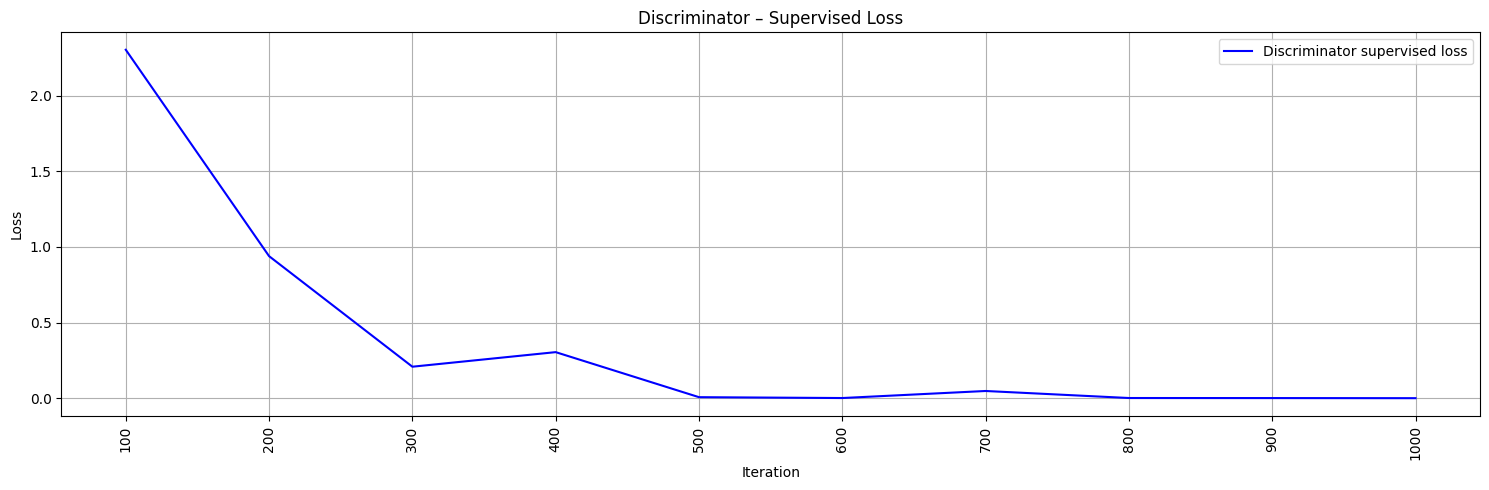

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

losses = np.array(supervised_losses)

# Plot Discriminator supervised loss
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses, label="Discriminator supervised loss", color='b')

plt.xticks(iteration_checkpoints, rotation=90)
plt.grid(True)

plt.title("Discriminator – Supervised Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from keras.utils import to_categorical

# Get training data
x_train, y_train = dataset.training_set()
y_train = np.argmax(y_train, axis=1)  # Convert one-hot encoded labels to class indices

# Compute classification accuracy on the training set
y_train = to_categorical(y_train, num_classes=num_classes)  # Convert to one-hot again if necessary
_, accuracy_train = discriminator_supervised.evaluate(x_train, y_train)
print("Training Accuracy: %.2f%%" % (100 * accuracy_train))

# Get test data
x_test, y_test = dataset.test_set()
y_test = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

# Compute classification accuracy on the test set
y_test = to_categorical(y_test, num_classes=num_classes)  # Convert to one-hot again if necessary
_, accuracy_test = discriminator_supervised.evaluate(x_test, y_test)
print("Test Accuracy: %.2f%%" % (100 * accuracy_test))


8/8 [==============================] - 2s 86ms/step - loss: 1.6577e-04 - accuracy: 1.0000
Training Accuracy: 100.00%
2/2 [==============================] - 0s 309ms/step - loss: 9.9790 - accuracy: 0.5500
Test Accuracy: 55.00%


In [ ]:
from keras.utils import to_categorical
from keras.optimizers import Adam

# Build and compile the fully supervised classifier
mnist_classifier = build_discriminator_supervised(build_discriminator_net(img_shape))
mnist_classifier.compile(loss='categorical_crossentropy',
                         metrics=['accuracy'],
                         optimizer=Adam())

# Get training data
imgs, labels = dataset.training_set()

# Convert labels from one-hot to class indices
labels = np.argmax(labels, axis=1)

# One-hot encode labels for training
labels = to_categorical(labels, num_classes=num_classes)

# Train the classifier
training = mnist_classifier.fit(x=imgs,
                                y=labels,
                                batch_size=32,
                                epochs=30,
                                verbose=1)

# Extract training history
losses = training.history['loss']
accuracies = training.history['accuracy']


Epoch 1/30
8/8 [==============================] - 5s 100ms/step - loss: 1.8115 - accuracy: 0.2417
Epoch 2/30
8/8 [==============================] - 0s 40ms/step - loss: 1.3495 - accuracy: 0.4625
Epoch 3/30
8/8 [==============================] - 0s 40ms/step - loss: 1.2556 - accuracy: 0.5417
Epoch 4/30
8/8 [==============================] - 0s 39ms/step - loss: 1.2095 - accuracy: 0.5375
Epoch 5/30
8/8 [==============================] - 0s 40ms/step - loss: 1.0214 - accuracy: 0.5958
Epoch 6/30
8/8 [==============================] - 0s 40ms/step - loss: 0.8554 - accuracy: 0.6542
Epoch 7/30
8/8 [==============================] - 0s 40ms/step - loss: 0.6756 - accuracy: 0.7583
Epoch 8/30
8/8 [==============================] - 0s 40ms/step - loss: 0.4770 - accuracy: 0.8542
Epoch 9/30
8/8 [==============================] - 0s 40ms/step - loss: 0.3017 - accuracy: 0.8708
Epoch 10/30
8/8 [==============================] - 0s 39ms/step - loss: 0.2654 - accuracy: 0.9333
Epoch 11/30
8/8 [===========

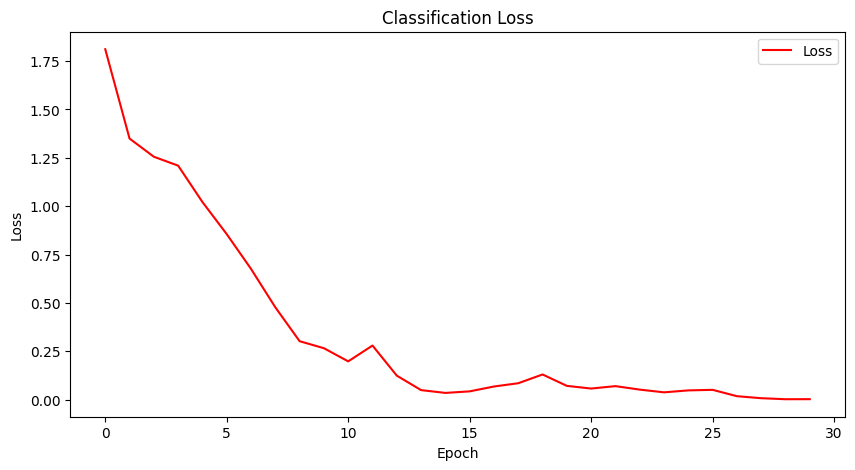

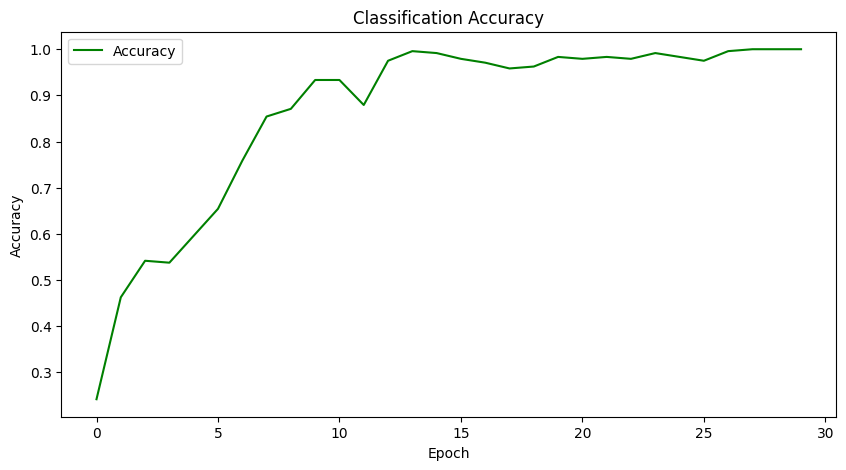

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert losses and accuracies to NumPy arrays
losses = np.array(losses)
accuracies = np.array(accuracies)

# Plot classification loss
plt.figure(figsize=(10, 5))
plt.plot(losses, label="Loss", color='r')
plt.title("Classification Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot classification accuracy
plt.figure(figsize=(10, 5))
plt.plot(accuracies, label="Accuracy", color='g')
plt.title("Classification Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


In [ ]:
from keras.utils import to_categorical

# Get training data
x_train, y_train = dataset.training_set()

# Convert labels from one-hot to class indices
y_train = np.argmax(y_train, axis=1)

# One-hot encode labels for evaluation
y_train = to_categorical(y_train, num_classes=num_classes)

# Compute classification accuracy on the training set
_, accuracy_train = mnist_classifier.evaluate(x_train, y_train)
print("Training Accuracy: %.2f%%" % (100 * accuracy_train))

# Get test data
x_test, y_test = dataset.test_set()

# Convert labels from one-hot to class indices
y_test = np.argmax(y_test, axis=1)

# One-hot encode labels for evaluation
y_test = to_categorical(y_test, num_classes=num_classes)

# Compute classification accuracy on the test set
_, accuracy_test = mnist_classifier.evaluate(x_test, y_test)
print("Test Accuracy: %.2f%%" % (100 * accuracy_test))


8/8 [==============================] - 0s 19ms/step - loss: 4.9177e-04 - accuracy: 1.0000
Training Accuracy: 100.00%
2/2 [==============================] - 0s 19ms/step - loss: 2.1168 - accuracy: 0.7333
Test Accuracy: 73.33%
